# <font color=green>:::::::::::: Image Classification with CNN for Malaria Data:::::::::::::::::::::::::</font>

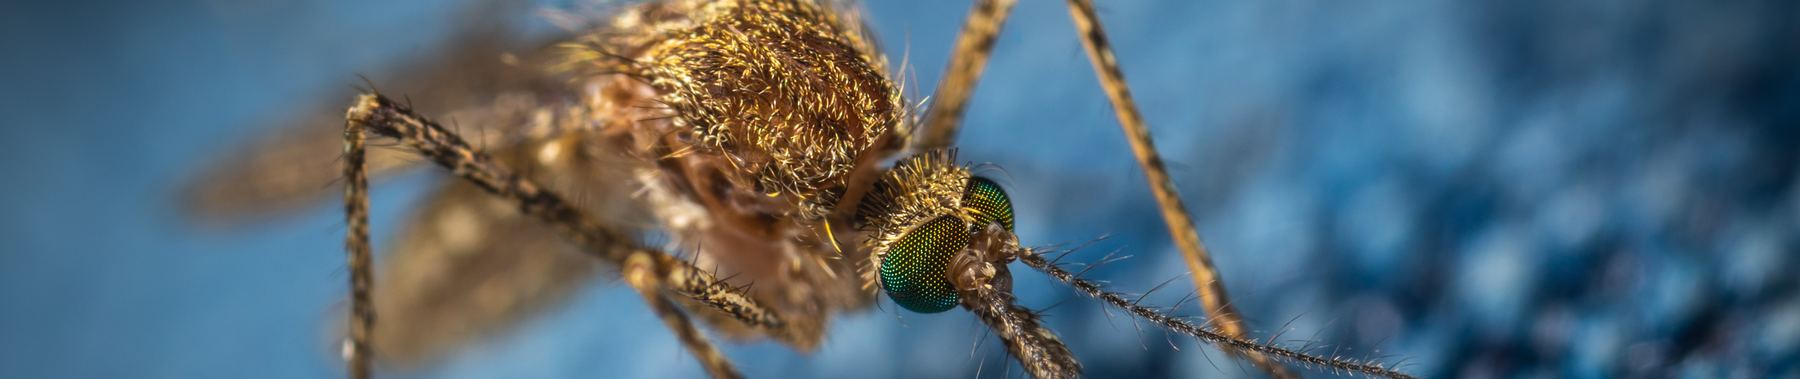

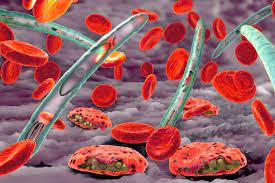

### Save humans by detecting and deploying Image Cells that contain Malaria or not!



In [2]:
!pip install torch

     -------------------------------------- 161.9/161.9 MB 2.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install torchvision

     ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import cv2
import os
import gc
import os
import torch
import torchvision
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from torch.utils.data import random_split
from torch.utils.data import DataLoader

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import normalize,scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import keras
import random

In [6]:

Uninfected_path = r"C:\Users\Ahmet\Desktop\AI General\Projects\P2-Image Classification with CNN for Malaria Data\cell_images\Uninfected"
Infected_path = r"C:\Users\Ahmet\Desktop\AI General\Projects\P2-Image Classification with CNN for Malaria Data\cell_images\Parasitized"


In [7]:
Uninfected = os.listdir(Uninfected_path)
Infected = os.listdir(Infected_path)

In [8]:
for i, name in enumerate(Uninfected):
    if name[-3:] != "png":
        print(f'{i} : {name}')
        print('Removed : ', Uninfected.pop(i))
        break

for i, name in enumerate(Infected):
    if name[-3:] != "png":
        print(f'{i} : {name}')
        print('Removed : ', Infected.pop(i))
        break

13779 : Thumbs.db
Removed :  Thumbs.db
13779 : Thumbs.db
Removed :  Thumbs.db


In [9]:
print("Uninfected = ", len(Uninfected))
print("Infected = ", len(Infected))

Uninfected =  13779
Infected =  13779


Infected


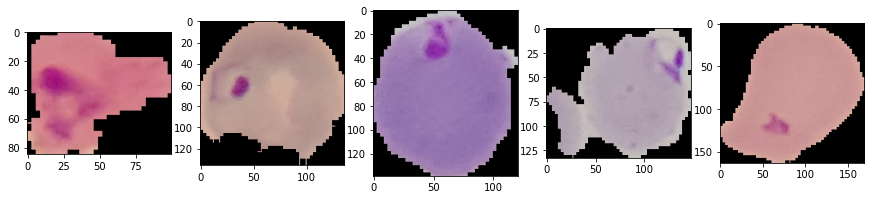

In [16]:
view_infected = random.sample(Infected, 5)

print("Infected")
fig, ax = plt.subplots(1,5, figsize=(15,5))
for i in range(5):
    path = Infected_path + '/' + view_infected[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

Uninfected


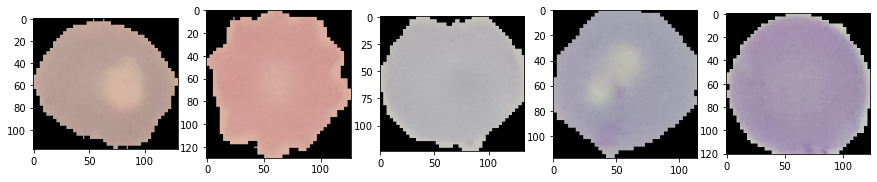

In [17]:
view_uninfected = random.sample(Uninfected, 5)

print("Uninfected")
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    path = Uninfected_path + '/' + view_uninfected[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

In [18]:
cells = list()
label = list()

IMG_SIZE = (64, 64)

try:
    cells = np.load('cells.npy')
    label = np.load('label.npy')
except FileNotFoundError:
    print("Processed files not found. \nProcessing...")

    for name in tqdm(Infected):
        path = Infected_path + '/' + name
        image = Image.open(path)
        image_data = np.array(image.resize(IMG_SIZE))
        cells.append(image_data)
        label.append(1)


    for name in tqdm(Uninfected):
        path = Uninfected_path + '/' + name
        image = Image.open(path)
        image_data = np.array(image.resize((64,64)))
        cells.append(image_data)
        label.append(0)


    cells = (np.array(cells).astype(float))/255
    label = np.array(label)
    
    np.save('cells.npy', cells)
    np.save('label.npy', label)

print(f'Cells Shape: {cells.shape} | Cells Dtype : {cells.dtype}')
print(f'Labels Shape: {label.shape} | Labels Dtype : {label.dtype}')

Processed files not found. 
Processing...


100%|███████████████████████████████████████████████████████████████████████████| 13779/13779 [01:21<00:00, 168.46it/s]


Cells Shape: (27558, 64, 64, 3) | Cells Dtype : float64
Labels Shape: (27558,) | Labels Dtype : int32


In [19]:
cells_train=cells[:20000]
cells_test=cells[20000:]

In [20]:
label_train=label[:20000]
label_test=label[20000:]

In [21]:
cells.shape,label.shape

((27558, 64, 64, 3), (27558,))

In [22]:
model=keras.Sequential([keras.layers.InputLayer(input_shape=(64,64,3)),
                        keras.layers.Reshape(target_shape=(64,64,3)),
                        keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation=tf.nn.relu),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(12)
                        ]) # CNN-Convolutional Neural Network

In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [35]:
model.fit(cells_train,label_train,validation_split=0.1,epochs=50)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
accuracy=model.evaluate(cells_test,label_test)

In [39]:
#Define the model architecture 3.50.00  
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(64,64,3)),
    keras.layers.Reshape(target_shape=(64,64,3)),
    keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation=tf.nn.relu), 
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10)

])
#CNN -Convolutional Neural Networks

In [40]:
#Train the digit classification model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [41]:
model.fit(cells_train,label_train,validation_split=0.1, epochs=10)

Epoch 1/10
563/563 [==============================] - 13s 23ms/step - loss: 0.4802 - accuracy: 0.7906 - val_loss: 2.1295 - val_accuracy: 0.0020
Epoch 2/10
563/563 [==============================] - 12s 21ms/step - loss: 0.3920 - accuracy: 0.8357 - val_loss: 1.6681 - val_accuracy: 0.1140
Epoch 3/10
563/563 [==============================] - 11s 20ms/step - loss: 0.3445 - accuracy: 0.8656 - val_loss: 1.6564 - val_accuracy: 0.1195
Epoch 4/10
563/563 [==============================] - 11s 20ms/step - loss: 0.3068 - accuracy: 0.8851 - val_loss: 1.0826 - val_accuracy: 0.3280
Epoch 5/10
563/563 [==============================] - 12s 21ms/step - loss: 0.2900 - accuracy: 0.8988 - val_loss: 1.1623 - val_accuracy: 0.3865
Epoch 6/10
563/563 [==============================] - 11s 20ms/step - loss: 0.2530 - accuracy: 0.9116 - val_loss: 1.2336 - val_accuracy: 0.3780
Epoch 7/10
563/563 [==============================] - 11s 20ms/step - loss: 0.2482 - accuracy: 0.9118 - val_loss: 1.2950 - val_accuracy:

In [42]:
_,accuracy=model.evaluate(cells_test,label_test)
print('Accuracy: %2f' % (accuracy*100))

237/237 [==============================] - 2s 7ms/step - loss: 1.1262 - accuracy: 0.5587
Accuracy: 55.874568


In [43]:
_

1.1261988878250122

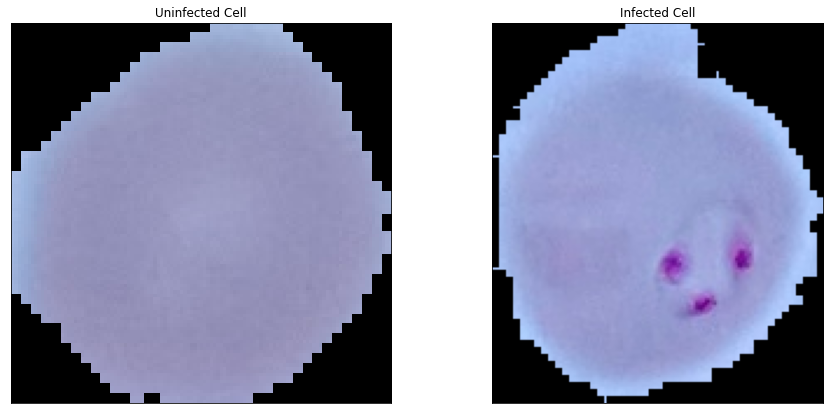

In [50]:
upic= r"C:\Users\Ahmet\Desktop\AI General\Projects\P2-Image Classification with CNN for Malaria Data\cell_images\Uninfected\C1_thinF_IMG_20150604_104722_cell_9.png"
apic=r"C:\Users\Ahmet\Desktop\AI General\Projects\P2-Image Classification with CNN for Malaria Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png"

plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [51]:
width = 128
height = 128

In [53]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [60]:
trainDatagen = datagen.flow_from_directory(directory=r"C:\Users\Ahmet\Desktop\AI General\Projects\P2-Image Classification with CNN for Malaria Data\cell_images"
,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 44095 images belonging to 3 classes.


In [59]:
valDatagen = datagen.flow_from_directory(directory= r"C:\Users\Ahmet\Desktop\AI General\Projects\P2-Image Classification with CNN for Malaria Data\cell_images",
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 11021 images belonging to 3 classes.


In [61]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)       

In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [65]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/20


C:\Users\Ahmet\AppData\Local\Temp\ipykernel_10684\3717032350.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


2756/2756 [==============================] - 451s 163ms/step - loss: -20294842449920.0000 - accuracy: 0.2500 - val_loss: -98291987513344.0000 - val_accuracy: 0.2500
Epoch 2/20
2756/2756 [==============================] - 358s 130ms/step - loss: -647358140383232.0000 - accuracy: 0.2500 - val_loss: -1526683840544768.0000 - val_accuracy: 0.2500
Epoch 3/20
2756/2756 [==============================] - 340s 123ms/step - loss: -4071917027852288.0000 - accuracy: 0.2500 - val_loss: -7097242867466240.0000 - val_accuracy: 0.2500
Epoch 4/20
2756/2756 [==============================] - 345s 125ms/step - loss: -14208037430493184.0000 - accuracy: 0.2500 - val_loss: -21148837724815360.0000 - val_accuracy: 0.2500
Epoch 5/20
2756/2756 [==============================] - 337s 122ms/step - loss: -36400419064250368.0000 - accuracy: 0.2500 - val_loss: -50196150371745792.0000 - val_accuracy: 0.2500
Epoch 6/20
2756/2756 [==============================] - 343s 125ms/step - loss: -79260529071226880.0000 - accura

In [ ]:
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy'])
    plt.plot(epochRange,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()
  
    plt.plot(epochRange,history.history['loss'])
    plt.plot(epochRange,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

In [ ]:
plotLearningCurve(history,6)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print(tf.__version__)

In [ ]:
dataset_url = r"C:\Users\Ahmet\Desktop\AI General\Projects\P2-Image Classification with CNN for Malaria Data\cell_images
data_dir = pathlib.Path(dataset_url)

In [ ]:
parasitized = list(data_dir.glob('Parasitized/*'))
PIL.Image.open(str(parasitized[0]))

In [ ]:
uninfected = list(data_dir.glob('Uninfected/*'))
PIL.Image.open(str(uninfected[0]))

In [ ]:
# batch_size = 32
img_height = 150
img_width = 150

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
class_names =train_ds.class_names
print(class_names)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = Sequential([
                    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
                    
])

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)       

In [ ]:
# epochs = 73
history = model.fit(
    train_df,
    validation_data=val_ds,
    epochs=epochs
)